<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

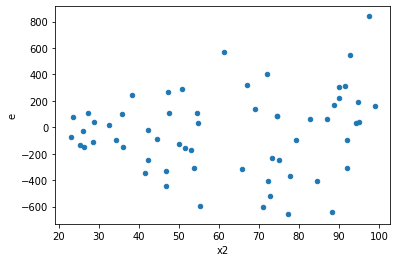

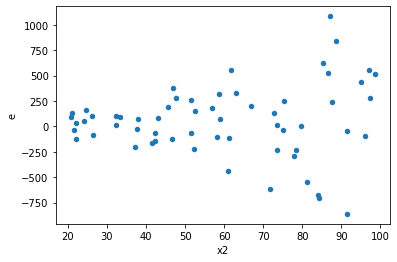

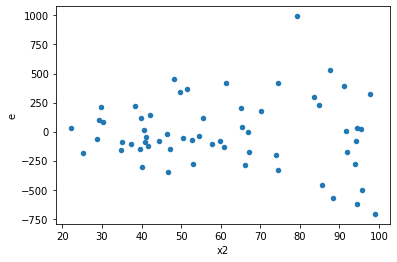

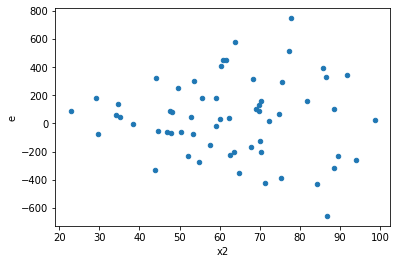

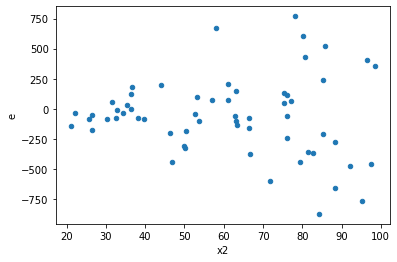

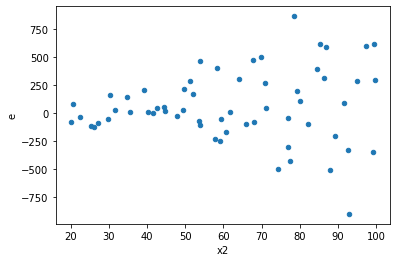

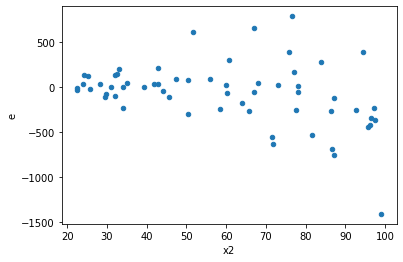

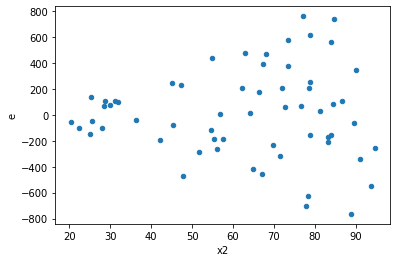

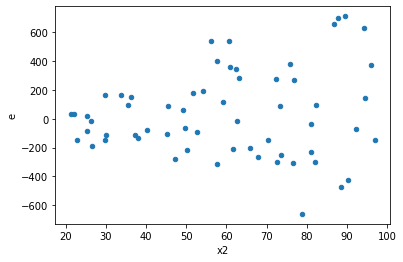

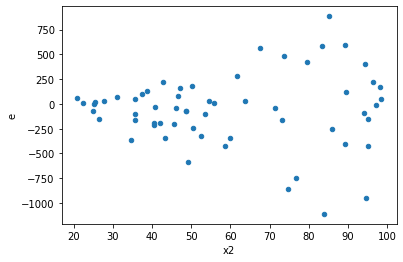

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,779514.5307976924,2299976.3387991483,35432.47867262238,104544.37903632493,2.9505240094056204,0.014205827278039429,0.9928970863609803,0.0071029136390197145,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,803524.547070704,4533889.432137393,36523.843048668365,206085.88327897244,5.642502707186674,0.00014506992196650081,0.9999274650390167,7.253496098325041e-05,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1317773.3623090503,2595769.6250528516,59898.789195865924,117989.52841149326,1.9698149160523704,0.1193646145776095,0.9403176927111953,0.05968230728880475,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,2219765.6110431873,2827430.202660569,100898.43686559942,128519.5546663895,1.2737516918877787,0.5752215418526578,0.7123892290736711,0.2876107709263289,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,557849.6035563195,2617325.7146364064,25356.800161650885,118969.3506652912,4.691812449002065,0.0006073455021069485,0.9996963272489465,0.00030367275105347424,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,992928.056499314,2620365.7499040146,45133.09347724155,119107.53408654612,2.6390288125631436,0.027199330944145395,0.9864003345279273,0.013599665472072697,Reject001=1 : Homoscedasticity
9.0,22.0,22.0,1906671.6470518676,3931126.6335230125,86666.89304781216,178687.57425104603,2.0617743173563188,0.0968795159888638,0.9515602420055681,0.0484397579944319,Reject001=1 : Homoscedasticity
10.0,22.0,22.0,525265.1103087404,4983004.846734468,23875.686832215473,226500.22030611217,9.486647311879436,1.680705909778979e-06,0.9999991596470451,8.403529548894895e-07,Reject001=0 : Heteroscedasticity
11.0,22.0,22.0,464344.69198984955,3318807.2099890895,21106.576908629526,150854.87318132224,7.147292231913006,2.04752297834343e-05,0.9999897623851083,1.023761489171715e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,779514.5307976924,2299976.3387991483,35432.47867262238,104544.37903632493,2.9505240094056204,0.014205827278039429,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,803524.547070704,4533889.432137393,36523.843048668365,206085.88327897244,5.642502707186674,0.00014506992196650081,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,2988895.251944618,776847.8498219236,135858.8750883917,35311.26590099653,0.2599113666885768,0.002543885690343115,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1317773.3623090503,2595769.6250528516,59898.789195865924,117989.52841149326,1.9698149160523704,0.1193646145776095,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,2219765.6110431873,2827430.202660569,100898.43686559942,128519.5546663895,1.2737516918877787,0.5752215418526578,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,557849.6035563195,2617325.7146364064,25356.800161650885,118969.3506652912,4.691812449002065,0.0006073455021069485,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,4054730.167069244,248352.67926417536,184305.91668496563,11288.758148371608,0.06125011259224791,9.705183564158523e-09,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,2784375.5752403056,2445287.379772812,126562.52614728663,111149.42635330964,0.8782175082690744,0.7634095379055822,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,992928.056499314,2620365.7499040146,45133.09347724155,119107.53408654612,2.6390288125631436,0.027199330944145395,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    570
Reject001=1 : Homoscedasticity      430
Name: Result_test, dtype: int64